# Approach Models

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define a function to load and run the TFLite model
def evaluate_model(tflite_model_path, img_height, img_width, image_folders, class_labels, resizing):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Initialize lists to hold true labels and predictions
    true_labels = []
    predictions = []

    # Process each folder and its images
    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                # Load and preprocess the image
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                if resizing:
                    img_array = np.array(img, dtype=np.float32) / 255.0  # Rescale the image
                else:
                    img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images

                # Set the tensor to the image
                interpreter.set_tensor(input_details[0]['index'], img_array)

                # Run inference
                interpreter.invoke()

                # Get the prediction
                predictions_array = interpreter.get_tensor(output_details[0]['index'])
                predicted_class = (predictions_array[0] > 0.5).astype(int)[0]  # Binary classification threshold
                
                # Append the true label and prediction
                true_labels.append(label)
                predictions.append(predicted_class)

    # Convert class indices to names
    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, pos_label='y')
    recall = recall_score(true_labels, predictions, pos_label='y')
    f1 = f1_score(true_labels, predictions, pos_label='y')

    return accuracy, precision, recall, f1, true_labels, predictions

# Define class names and directories
class_names = {0: 'n', 1: 'y'}
image_folders = {
    0: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_approach_n',
    1: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_approach_y'
}

# List of models with their properties
models = [
    {'path': 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_approach.tflite', 'img_height': 180, 'img_width': 180, 'resizing': False},
    {'path': 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\best_model1_orig.tflite', 'img_height': 64, 'img_width': 64, 'resizing': True}
]

# Evaluate each model and store the results
results = {}
for model in models:
    model_name = os.path.basename(model['path'])
    accuracy, precision, recall, f1, true_labels, predictions = evaluate_model(
        tflite_model_path=model['path'],
        img_height=model['img_height'],
        img_width=model['img_width'],
        image_folders=image_folders,
        class_labels=class_names,
        resizing=model['resizing']
    )
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Print the results
for model_name, metrics in results.items():
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}\n")

# Plotting the metrics
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(results[models[0]['path']].keys()))
bar_width = 0.35

for i, (model_name, metrics) in enumerate(results.items()):
    bars = ax.bar([j + i * bar_width for j in index], metrics.values(), bar_width, label=model_name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(results[models[0]['path']].keys())
ax.legend()

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for bars in ax.containers:
    add_labels(bars)

plt.show()


In [10]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to load and run the TFLite model
def evaluate_model(tflite_model_path, img_height, img_width, image_folders, class_labels, resizing):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Initialize lists to hold true labels and predictions
    true_labels = []
    predictions = []

    # Process each folder and its images
    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                # Load and preprocess the image
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                if resizing == True:
                    img_array = np.array(img, dtype=np.float32)/ 255.0  # Rescale the image
                else:
                    img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images

                # Set the tensor to the image
                interpreter.set_tensor(input_details[0]['index'], img_array)

                # Run inference
                interpreter.invoke()

                # Get the prediction
                predictions_array = interpreter.get_tensor(output_details[0]['index'])
                predicted_class = (predictions_array[0] > 0.5).astype(int)[0]  # Binary classification threshold
                
                # Append the true label and prediction
                true_labels.append(label)
                predictions.append(predicted_class)

    # Convert class indices to names
    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, pos_label='y')
    recall = recall_score(true_labels, predictions, pos_label='y')
    f1 = f1_score(true_labels, predictions, pos_label='y')

    return accuracy, precision, recall, f1, true_labels, predictions

# Define class names and directories
class_names = {0: 'n', 1: 'y'}
image_folders = {
    0: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_approach_n',
    1: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_approach_y'
}

# Evaluate the first model
accuracy_approach, precision_approach, recall_approach, f1_approach, true_labels_approach, predictions_approach = evaluate_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_approach.tflite',
    img_height=180,
    img_width=180,
    image_folders=image_folders,
    class_labels=class_names,
    resizing=False
)

# Evaluate the second model
accuracy_orig, precision_orig, recall_orig, f1_orig, true_labels_orig, predictions_orig = evaluate_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\best_model1_orig.tflite',
    img_height=64,
    img_width=64,
    image_folders=image_folders,
    class_labels=class_names,
    resizing=True
)

# Print the results
print("Performance of model_approach.tflite:")
print(f"Accuracy: {accuracy_approach:.4f}")
print(f"Precision: {precision_approach:.4f}")
print(f"Recall: {recall_approach:.4f}")
print(f"F1-Score: {f1_approach:.4f}\n")

print("Performance of best_model1_orig.tflite:")
print(f"Accuracy: {accuracy_orig:.4f}")
print(f"Precision: {precision_orig:.4f}")
print(f"Recall: {recall_orig:.4f}")
print(f"F1-Score: {f1_orig:.4f}")


Performance of model_approach.tflite:
Accuracy: 0.8333
Precision: 0.8800
Recall: 0.7719
F1-Score: 0.8224

Performance of best_model1_orig.tflite:
Accuracy: 0.7368
Precision: 0.8293
Recall: 0.5965
F1-Score: 0.6939


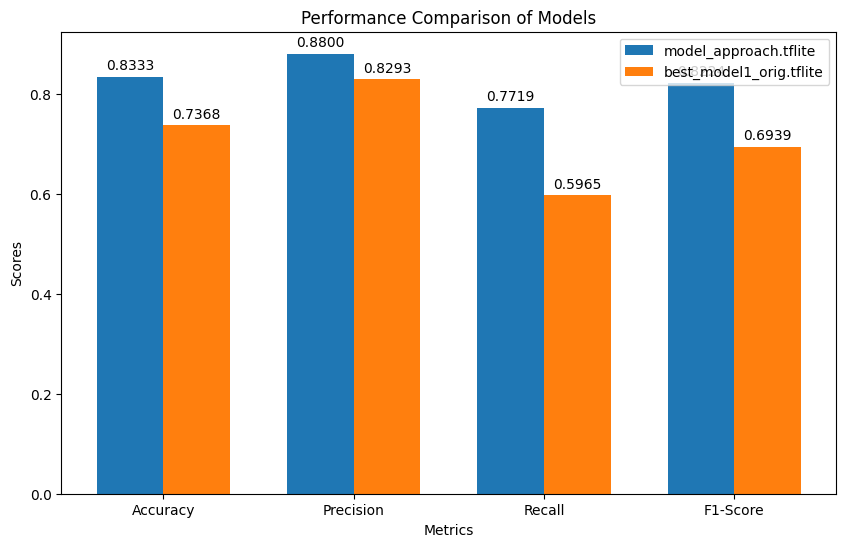

In [11]:
import matplotlib.pyplot as plt

# Metrics from the model evaluation
metrics_approach = {
    'Accuracy': accuracy_approach,
    'Precision': precision_approach,
    'Recall': recall_approach,
    'F1-Score': f1_approach
}

metrics_orig = {
    'Accuracy': accuracy_orig,
    'Precision': precision_orig,
    'Recall': recall_orig,
    'F1-Score': f1_orig
}

# Plotting the metrics
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(metrics_approach))
bar_width = 0.35

bar1 = ax.bar(index, metrics_approach.values(), bar_width, label='model_approach.tflite')
bar2 = ax.bar([i + bar_width for i in index], metrics_orig.values(), bar_width, label='best_model1_orig.tflite')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics_approach.keys())
ax.legend()

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()


# HSR Models

In [12]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to load and run the TFLite model
def evaluate_model(tflite_model_path, img_height, img_width, image_folders, class_labels):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Initialize lists to hold true labels and predictions
    true_labels = []
    predictions = []

    # Process each folder and its images
    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                # Load and preprocess the image
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images

                # Set the tensor to the image
                interpreter.set_tensor(input_details[0]['index'], img_array)

                # Run inference
                interpreter.invoke()

                # Get the prediction
                predictions_array = interpreter.get_tensor(output_details[0]['index'])
                predicted_class = np.argmax(predictions_array, axis=1)[0]  # Get the class index
                
                # Append the true label and prediction
                true_labels.append(label)
                predictions.append(predicted_class)

    # Convert class indices to names
    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1, true_labels, predictions

# Define class names and directories
class_names = {0: 'h', 1: 'r', 2: 's'}
image_folders = {
    0: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_h',
    1: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_r',
    2: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_s'
}

# Evaluate the first model
accuracy_hrs4, precision_hrs4, recall_hrs4, f1_hrs4, true_labels_hrs4, predictions_hrs4 = evaluate_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_hrs6.tflite',
    img_height=180,
    img_width=180,
    image_folders=image_folders,
    class_labels=class_names
)

# Evaluate the second model
accuracy_hrs5, precision_hrs5, recall_hrs5, f1_hrs5, true_labels_hrs5, predictions_hrs5 = evaluate_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_hrs5.tflite',
    img_height=480,
    img_width=480,
    image_folders=image_folders,
    class_labels=class_names
)

# Print the results
print("Performance of best_model_hrs6.tflite:")
print(f"Accuracy: {accuracy_hrs4:.4f}")
print(f"Precision: {precision_hrs4:.4f}")
print(f"Recall: {recall_hrs4:.4f}")
print(f"F1-Score: {f1_hrs4:.4f}\n")

print("Performance of model_hrs5.tflite:")
print(f"Accuracy: {accuracy_hrs5:.4f}")
print(f"Precision: {precision_hrs5:.4f}")
print(f"Recall: {recall_hrs5:.4f}")
print(f"F1-Score: {f1_hrs5:.4f}")


Performance of best_model_hrs4.tflite:
Accuracy: 0.7925
Precision: 0.8721
Recall: 0.7925
F1-Score: 0.7847

Performance of model_hrs5.tflite:
Accuracy: 0.7673
Precision: 0.8630
Recall: 0.7673
F1-Score: 0.7668


plot results

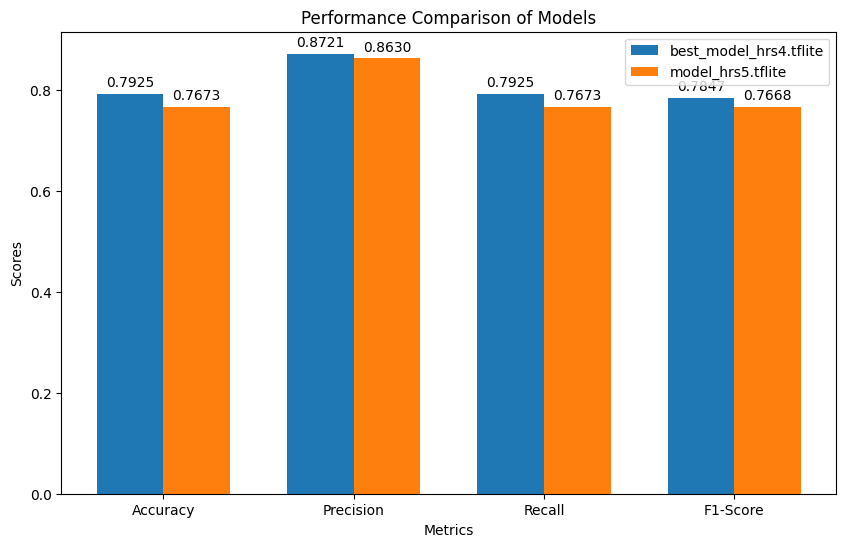

In [13]:
import matplotlib.pyplot as plt

metrics_hrs4 = {
    'Accuracy': accuracy_hrs4,
    'Precision': precision_hrs4,
    'Recall': recall_hrs4,
    'F1-Score': f1_hrs4
}

metrics_hrs5 = {
    'Accuracy': accuracy_hrs5,
    'Precision': precision_hrs5,
    'Recall': recall_hrs5,
    'F1-Score': f1_hrs5
}

fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(metrics_hrs4))
bar_width = 0.35

bar1 = ax.bar(index, metrics_hrs4.values(), bar_width, label='best_model_hrs4.tflite')
bar2 = ax.bar([i + bar_width for i in index], metrics_hrs5.values(), bar_width, label='model_hrs5.tflite')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics_hrs4.keys())
ax.legend()

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()

# Compare h5 model to tflite

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate TFLite models
def evaluate_tflite_model(tflite_model_path, img_height, img_width, image_folders, class_labels):
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    true_labels = []
    predictions = []

    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)

                interpreter.set_tensor(input_details[0]['index'], img_array)
                interpreter.invoke()

                predictions_array = interpreter.get_tensor(output_details[0]['index'])
                predicted_class = np.argmax(predictions_array, axis=1)[0]
                
                true_labels.append(label)
                predictions.append(predicted_class)

    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1, true_labels, predictions

# Function to evaluate .h5 models
def evaluate_h5_model(h5_model_path, img_height, img_width, image_folders, class_labels):
    model = load_model(h5_model_path)

    true_labels = []
    predictions = []

    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)

                predictions_array = model.predict(img_array)
                predicted_class = np.argmax(predictions_array, axis=1)[0]
                
                true_labels.append(label)
                predictions.append(predicted_class)

    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1, true_labels, predictions

# Define class names and directories
class_names = {0: 'h', 1: 'r', 2: 's'}
image_folders = {
    0: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_h',
    1: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_r',
    2: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_s'
}

# Evaluate the TFLite model
accuracy_tflite, precision_tflite, recall_tflite, f1_tflite, true_labels_tflite, predictions_tflite = evaluate_tflite_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_hrs6.tflite',
    img_height=180,
    img_width=180,
    image_folders=image_folders,
    class_labels=class_names
)

# Evaluate the .h5 model
accuracy_h5, precision_h5, recall_h5, f1_h5, true_labels_h5, predictions_h5 = evaluate_h5_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_hrs5.h5',
    img_height=180,
    img_width=180,
    image_folders=image_folders,
    class_labels=class_names
)

# Print the results
print("Performance of model_hrs6.tflite:")
print(f"Accuracy: {accuracy_tflite:.4f}")
print(f"Precision: {precision_tflite:.4f}")
print(f"Recall: {recall_tflite:.4f}")
print(f"F1-Score: {f1_tflite:.4f}\n")

print("Performance of model_hrs5.h5:")
print(f"Accuracy: {accuracy_h5:.4f}")
print(f"Precision: {precision_h5:.4f}")
print(f"Recall: {recall_h5:.4f}")
print(f"F1-Score: {f1_h5:.4f}")
